# Consumer Price Index DataFrame example

By [Ben Welsh](http://palewi.re/who-is-ben-welsh/)

A rudimentary example of how to import Consumer Price Index data published by the U.S. Bureau of Labor Statistics into a pandas DataFrame using the [cpi](https://github.com/datadesk/cpi) open-source Python wrapper. 

### Access the development version of the library

You will not need to do this if you install the library from PyPI. Instead, simply run:

```
$ pip install cpi
```

In [1]:
import os
import sys
this_dir = os.path.dirname(os.getcwd())
sys.path.insert(0, this_dir)

### Import the cpi library itself.

This you will want to do.

In [2]:
import cpi

### Access a list of all CPI series in a DataFrame

The `to_dataframe` method on cpi's series list is ready to serve.

In [3]:
series_df = cpi.series.to_dataframe()

In [4]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 13 columns):
area_code              7795 non-null object
area_id                7795 non-null object
area_name              7795 non-null object
id                     7795 non-null object
items_code             7795 non-null object
items_id               7795 non-null object
items_name             7795 non-null object
periodicity_code       7795 non-null object
periodicity_id         7795 non-null object
periodicity_name       7795 non-null object
seasonally_adjusted    7795 non-null bool
survey                 7795 non-null object
title                  7795 non-null object
dtypes: bool(1), object(12)
memory usage: 738.5+ KB


In [5]:
series_df.head()

,area_code,area_id,area_name,id,items_code,items_id,items_name,periodicity_code,periodicity_id,periodicity_name,seasonally_adjusted,survey,title
0,0000,0000,U.S. city average,CUSR0000SA0,SA0,SA0,All items,R,R,Monthly,True,All urban consumers,"All items in U.S. city average, all urban cons..."
1,0000,0000,U.S. city average,CUSR0000SA0E,SA0E,SA0E,Energy,R,R,Monthly,True,All urban consumers,"Energy in U.S. city average, all urban consume..."
2,0000,0000,U.S. city average,CUSR0000SA0L1,SA0L1,SA0L1,All items less food,R,R,Monthly,True,All urban consumers,"All items less food in U.S. city average, all ..."
3,0000,0000,U.S. city average,CUSR0000SA0L12,SA0L12,SA0L12,All items less food and shelter,R,R,Monthly,True,All urban consumers,All items less food and shelter in U.S. city a...
4,0000,0000,U.S. city average,CUSR0000SA0L12E,SA0L12E,SA0L12E,"All items less food, shelter, and energy",R,R,Monthly,True,All urban consumers,"All items less food, shelter, and energy in U...."


### Access all the indexes for a single series in a DataFrame.

Pull an individual series from cpi.

In [6]:
series_obj = cpi.series.get(items="Housing", area="Los Angeles-Long Beach-Anaheim, CA")

In [7]:
series_obj

<Series: CUURS49ASAH: Housing in Los Angeles-Long Beach-Anaheim, CA, all urban consumers, not seasonally adjusted>

Call `to_dataframe` to receive all is indexes.

In [8]:
index_df = series_obj.to_dataframe()

In [9]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 19 columns):
period_abbreviation           553 non-null object
period_code                   553 non-null object
period_id                     553 non-null object
period_name                   553 non-null object
series_area_code              553 non-null object
series_area_id                553 non-null object
series_area_name              553 non-null object
series_id                     553 non-null object
series_items_code             553 non-null object
series_items_id               553 non-null object
series_items_name             553 non-null object
series_periodicity_code       553 non-null object
series_periodicity_id         553 non-null object
series_periodicity_name       553 non-null object
series_seasonally_adjusted    553 non-null bool
series_survey                 553 non-null object
series_title                  553 non-null object
value                         553 non-null floa

In [17]:
index_df.head()

,period_abbreviation,period_code,period_id,period_name,series_area_code,series_area_id,series_area_name,series_id,series_items_code,series_items_id,series_items_name,series_periodicity_code,series_periodicity_id,series_periodicity_name,series_seasonally_adjusted,series_survey,series_title,value,year
0,JAN,M01,M01,January,S49A,S49A,"Los Angeles-Long Beach-Anaheim, CA",CUURS49ASAH,SAH,SAH,Housing,R,R,Monthly,False,All urban consumers,"Housing in Los Angeles-Long Beach-Anaheim, CA,...",155.4,1997
1,FEB,M02,M02,February,S49A,S49A,"Los Angeles-Long Beach-Anaheim, CA",CUURS49ASAH,SAH,SAH,Housing,R,R,Monthly,False,All urban consumers,"Housing in Los Angeles-Long Beach-Anaheim, CA,...",155.6,1997
2,MAR,M03,M03,March,S49A,S49A,"Los Angeles-Long Beach-Anaheim, CA",CUURS49ASAH,SAH,SAH,Housing,R,R,Monthly,False,All urban consumers,"Housing in Los Angeles-Long Beach-Anaheim, CA,...",155.5,1997
3,APR,M04,M04,April,S49A,S49A,"Los Angeles-Long Beach-Anaheim, CA",CUURS49ASAH,SAH,SAH,Housing,R,R,Monthly,False,All urban consumers,"Housing in Los Angeles-Long Beach-Anaheim, CA,...",155.2,1997
4,MAY,M05,M05,May,S49A,S49A,"Los Angeles-Long Beach-Anaheim, CA",CUURS49ASAH,SAH,SAH,Housing,R,R,Monthly,False,All urban consumers,"Housing in Los Angeles-Long Beach-Anaheim, CA,...",156.1,1997


### Now let's show off a little and make a chart

Import Altair and you can rip right away.

In [11]:
import altair as alt

Here's a chart of all the annual values in in the series I pulled above.

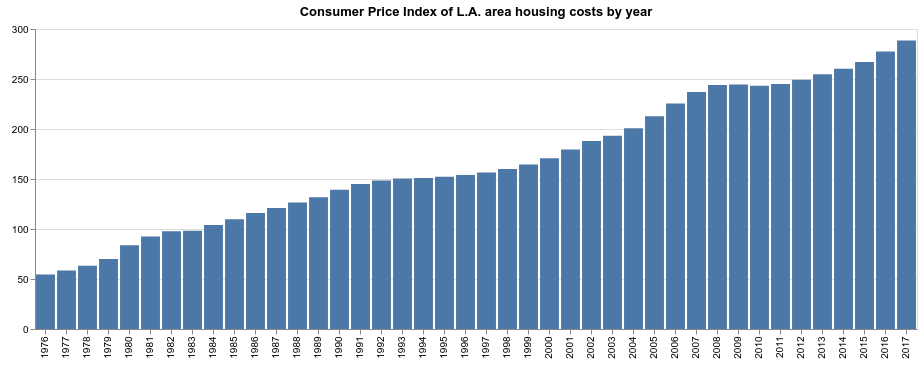

In [37]:
alt.Chart(index_df, title="Consumer Price Index of L.A. area housing costs by year").mark_bar().encode(
    x=alt.X("year:O", axis=alt.Axis(title="")),
    y=alt.Y("value:Q", axis=alt.Axis(title=""))
).transform_filter(
    # We will filter down to annual values to simplify things and drop the monthly values.
    alt.datum.period_name == 'Annual Average'
)